In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pytorch-lightning pandas xarray torchist xskillscore pyyaml zarr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 100.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 77.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/chaosbench')

In [ ]:
from config import DATA_DIR, PARAMS, PRESSURE_LEVELS
print(DATA_DIR)
print(PARAMS, PRESSURE_LEVELS)

/content/drive/MyDrive/era5_csv
['z', 'q', 't', 'u', 'v', 'w'] [10, 50, 100, 200, 300, 500, 700, 850, 925, 1000]


In [ ]:
import xarray as xr
from pathlib import Path

climatology_path = Path('/content/drive/MyDrive/climatology/climatology_era5.zarr')
climatology = xr.open_zarr(climatology_path)

print(climatology_path)
print(climatology_path.exists())
print(climatology_path)

print(climatology_path / 'mean')
print(climatology_path / 'mean')

print(climatology_path.exists())
print(list(climatology_path.glob('*')))

/content/drive/MyDrive/climatology/climatology_era5.zarr
True
/content/drive/MyDrive/climatology/climatology_era5.zarr
/content/drive/MyDrive/climatology/climatology_era5.zarr/mean
/content/drive/MyDrive/climatology/climatology_era5.zarr/mean
True
[PosixPath('/content/drive/MyDrive/climatology/climatology_era5.zarr/.zmetadata'), PosixPath('/content/drive/MyDrive/climatology/climatology_era5.zarr/.zgroup'), PosixPath('/content/drive/MyDrive/climatology/climatology_era5.zarr/.zattrs'), PosixPath('/content/drive/MyDrive/climatology/climatology_era5.zarr/mean'), PosixPath('/content/drive/MyDrive/climatology/climatology_era5.zarr/param'), PosixPath('/content/drive/MyDrive/climatology/climatology_era5.zarr/sigma')]


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/era5_csv/era5_csv/1980/q_19800106.csv')
print(df.head())

   level  latitude  longitude         q        date
0     10      60.0        0.0  0.000003  1980-01-06
1     10      60.0        1.5  0.000003  1980-01-06
2     10      60.0      351.0  0.000003  1980-01-06
3     10      60.0      352.5  0.000003  1980-01-06
4     10      60.0      354.0  0.000003  1980-01-06


In [ ]:
from pathlib import Path
import config

year_path = Path(config.DATA_DIR) / 'era5_csv' / '1980'
csv_files = sorted(year_path.glob('*.csv'))
print("Found CSV files:", csv_files[:5])

Found CSV files: [PosixPath('/content/drive/MyDrive/era5_csv/era5_csv/1980/q_19800101.csv'), PosixPath('/content/drive/MyDrive/era5_csv/era5_csv/1980/q_19800102.csv'), PosixPath('/content/drive/MyDrive/era5_csv/era5_csv/1980/q_19800103.csv'), PosixPath('/content/drive/MyDrive/era5_csv/era5_csv/1980/q_19800104.csv'), PosixPath('/content/drive/MyDrive/era5_csv/era5_csv/1980/q_19800105.csv')]


In [ ]:
import pandas as pd
import numpy as np
import xarray as xr

df = pd.read_csv('/content/drive/MyDrive/era5_csv/era5_csv/1980/q_19800106.csv')
pressure_levels = [10, 50, 100, 200, 300, 500, 700, 850, 925, 1000]

daily_data = []
for level in pressure_levels:
    level_data = df[df['level'] == level]['q'].values
    daily_data.append(level_data.flatten())

daily_data = np.concatenate(daily_data)
print("Daily data shape:", daily_data.shape)

climatology = xr.open_zarr('/content/drive/MyDrive/climatology/climatology_era5.zarr')
mean = climatology['mean'].values
sigma = climatology['sigma'].values

print("daily_data shape:", daily_data.shape)
print("mean shape:", mean.shape)
print("sigma shape:", sigma.shape)


Daily data shape: (640,)
daily_data shape: (640,)
mean shape: (60,)
sigma shape: (60,)


In [ ]:
import xarray as xr

climatology_path = "/content/drive/MyDrive/climatology/climatology_era5.zarr"
climatology = xr.open_zarr(climatology_path)

print(climatology)
print("Climatology mean shape:", climatology['mean'].shape)
print("Climatology sigma shape:", climatology['sigma'].shape)
print("Climatology param shape:", climatology['param'].shape)


<xarray.Dataset> Size: 2kB
Dimensions:  (param: 60)
Coordinates:
  * param    (param) <U6 1kB 'z-10' 'z-50' 'z-100' ... 'w-850' 'w-925' 'w-1000'
Data variables:
    mean     (param) float32 240B dask.array<chunksize=(60,), meta=np.ndarray>
    sigma    (param) float32 240B dask.array<chunksize=(60,), meta=np.ndarray>
Climatology mean shape: (60,)
Climatology sigma shape: (60,)
Climatology param shape: (60,)


In [ ]:
import numpy as np
import pandas as pd
import xarray as xr
from pathlib import Path

# Load climatology data
climatology = xr.open_zarr('/content/drive/MyDrive/climatology/climatology_era5.zarr')
climatology_mean = climatology['mean'].values
climatology_sigma = climatology['sigma'].values
climatology_params = climatology['param'].values

# Print the parameters to confirm ordering and indexing:
print("Parameters:", climatology_params)

# Check for 'q' and its indices explicitly:
param_name = 'q'
indices = [i for i, param in enumerate(climatology_params) if param.startswith(param_name)]
print("Indices for 'q':", indices)

# Extracting and printing normalization values explicitly
for idx, level in zip(indices, pressure_levels):
    mean = climatology_mean[idx]
    sigma = climatology_sigma[idx]
    print(f"Level: {level}, Mean: {mean}, Sigma: {sigma}")


Parameters: ['z-10' 'z-50' 'z-100' 'z-200' 'z-300' 'z-500' 'z-700' 'z-850' 'z-925'
 'z-1000' 'q-10' 'q-50' 'q-100' 'q-200' 'q-300' 'q-500' 'q-700' 'q-850'
 'q-925' 'q-1000' 't-10' 't-50' 't-100' 't-200' 't-300' 't-500' 't-700'
 't-850' 't-925' 't-1000' 'u-10' 'u-50' 'u-100' 'u-200' 'u-300' 'u-500'
 'u-700' 'u-850' 'u-925' 'u-1000' 'v-10' 'v-50' 'v-100' 'v-200' 'v-300'
 'v-500' 'v-700' 'v-850' 'v-925' 'v-1000' 'w-10' 'w-50' 'w-100' 'w-200'
 'w-300' 'w-500' 'w-700' 'w-850' 'w-925' 'w-1000']
Indices for 'q': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Level: 1000, Mean: 3.2186317184823565e-06, Sigma: 3.580070710995642e-07
Level: 925, Mean: 2.6868349323194707e-06, Sigma: 3.837992892385955e-07
Level: 850, Mean: 2.64743698608072e-06, Sigma: 5.876930231352162e-07
Level: 700, Mean: 1.9505238014971837e-05, Sigma: 2.290197335241828e-05
Level: 500, Mean: 0.00012778336531482637, Sigma: 0.00016976914776023477
Level: 300, Mean: 0.0008558526751585305, Sigma: 0.001087890937924385
Level: 200, Mean: 0.0024

In [ ]:
!pip install pytorch-lightning


In [ ]:
sys.path.append('/content/drive/MyDrive/chaosbench')

In [ ]:
from dataset import CSV_ERA5_Dataset
import config

train_years = ['1980']
train_dataset = CSV_ERA5_Dataset(years=train_years, is_normalized=True)

print("Dataset length:", len(train_dataset))

timestamp, sample_input, sample_output = train_dataset[0]

print("Timestamp:", timestamp)
print("Sample input shape:", sample_input.shape)
print("Sample output shape:", sample_output.shape)

Dataset length: 321
Timestamp: 0
Sample input shape: torch.Size([48, 9, 8])
Sample output shape: torch.Size([45, 48, 9, 8])


In [ ]:
import torch
import yaml
import pytorch_lightning as pl
from dataset import CSV_ERA5_Dataset
from models.model import S2SBenchmarkModel
import config

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load configuration arguments from YAML
config_filepath = '/content/drive/MyDrive/chaosbench/configs/fno_pinn.yaml'
with open(config_filepath, 'r') as file:
    config_yaml = yaml.safe_load(file)

model_args = config_yaml['model_args']
data_args = config_yaml['data_args']

# Dataset initialization
train_dataset = CSV_ERA5_Dataset(
    years=data_args['train_years'],
    variables=config.PARAMS,
    pressure_levels=config.PRESSURE_LEVELS,
    is_normalized=True
)

val_dataset = CSV_ERA5_Dataset(
    years=data_args['val_years'],
    variables=config.PARAMS,
    pressure_levels=config.PRESSURE_LEVELS,
    is_normalized=True
)

# Data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=model_args.get('batch_size', 8), shuffle=True, num_workers=model_args.get('num_workers', 8))
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=model_args.get('batch_size', 8), num_workers=model_args.get('num_workers', 8))

#For scheduler
model_args['train_steps_per_epoch'] = len(train_loader)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
import pytorch_lightning as pl

class LossPlotCallback(pl.Callback):
    def __init__(self, save_dir):
        self.train_losses = []
        self.val_losses = []
        self.save_dir = save_dir

    def on_train_epoch_end(self, trainer, pl_module):
        train_loss = trainer.callback_metrics.get("train_loss")
        if train_loss is not None:
            self.train_losses.append(train_loss.item())
        self._update_plot()

    def on_validation_epoch_end(self, trainer, pl_module):
        val_loss = trainer.callback_metrics.get("val_loss")
        if val_loss is not None:
            self.val_losses.append(val_loss.item())
        self._update_plot()

    def _update_plot(self):
        if not (self.train_losses or self.val_losses):
            return
        clear_output(wait=True)
        plt.figure(figsize=(10, 6))
        if self.train_losses:
            epochs_train = range(1, len(self.train_losses) + 1)
            plt.plot(epochs_train, self.train_losses, label="Train Loss")
        if self.val_losses:
            epochs_val = range(1, len(self.val_losses) + 1)
            plt.plot(epochs_val, self.val_losses, label="Validation Loss")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title("Loss over Epochs")
        plt.legend()
        plt.grid(True)
        plot_path = os.path.join(self.save_dir, "loss_curve.png")
        plt.savefig(plot_path)
        display(plt.gcf())
        plt.close()

    def on_fit_end(self, trainer, pl_module):
        self._update_plot()


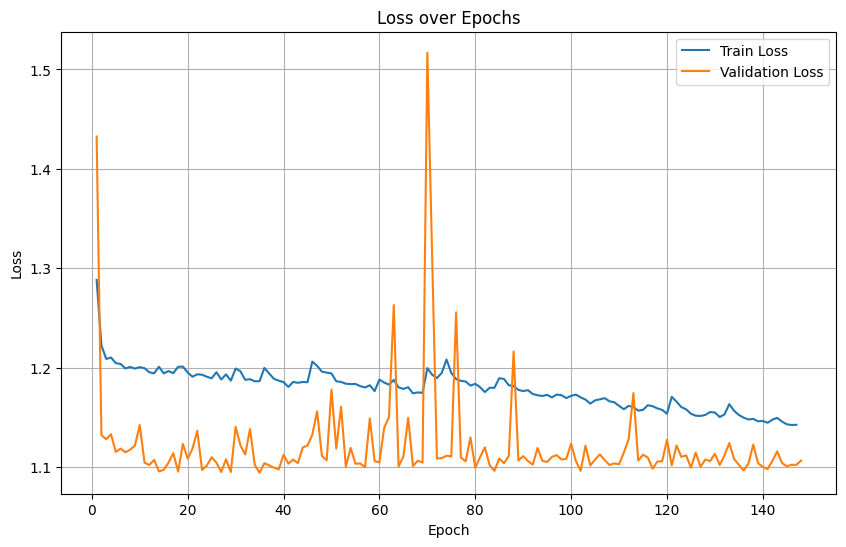

INFO:pytorch_lightning.utilities.rank_zero:
Detected KeyboardInterrupt, attempting graceful shutdown ...


NameError: name 'exit' is not defined

In [ ]:
import os
import torch
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

# Set up checkpoint directory on Google Drive
gdrive_checkpoint_dir = '/content/drive/MyDrive/ChaosBench/checkpoints/'
os.makedirs(gdrive_checkpoint_dir, exist_ok=True)

# Define checkpoint callback to save in Google Drive
checkpoint_callback = ModelCheckpoint(
    monitor='val_loss',
    mode='min',
    save_top_k=1,
    dirpath=gdrive_checkpoint_dir,
    filename='best_model',
)

# Instantiate our live loss plotting callback
loss_plot_callback = LossPlotCallback(save_dir=gdrive_checkpoint_dir)

# Model initialization
model = S2SBenchmarkModel(model_args=model_args, data_args=data_args)
model.setup()

# Lightning trainer setup with TensorBoard logging (logs still in Google Drive)
trainer = pl.Trainer(
    devices=1,
    accelerator='gpu',
    max_epochs=model_args.get('epochs', 300),
    logger=pl.loggers.TensorBoardLogger(save_dir='/content/drive/MyDrive/chaosbench/logs'),
    callbacks=[checkpoint_callback, loss_plot_callback]
)

# Start training
trainer.fit(model, train_dataloaders=train_loader, val_dataloaders=val_loader)
